In [17]:
pip install matplotlib umap-learn[plot] dask[dataframe]

Note: you may need to restart the kernel to use updated packages.


In [2]:
from umap import UMAP
umap_model = UMAP(n_neighbors=10, n_components=8, min_dist=0.0, metric='cosine', random_state=42)
umap_model

UMAP(metric='cosine', min_dist=0.0, n_components=8, n_neighbors=10, random_state=42)

In [3]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
hdbscan_model

HDBSCAN(min_cluster_size=50, prediction_data=True)

In [4]:
from safetensors.torch import load_file

In [5]:
embeddings = load_file("/workspace/embeddings.safetensors")

In [6]:
embeddings = embeddings["embeddings"]

In [7]:
embeddings

tensor([[-0.3585, -0.2605,  0.0638,  ...,  0.2500, -0.0972,  0.2093],
        [ 0.3710, -0.2400,  0.5794,  ...,  0.1147, -0.3229, -0.3595],
        [-0.1424,  0.1967, -0.4405,  ..., -0.0211, -0.3500,  0.0502],
        ...,
        [-0.0600,  1.3236,  0.0438,  ..., -0.5655,  0.0663, -0.0193],
        [-0.1206, -0.4493, -0.0328,  ..., -0.0252, -0.9784, -0.9554],
        [ 0.1051,  0.0271,  0.3072,  ...,  0.5899, -0.9996,  0.0636]])

In [8]:
ump = UMAP()
ump

UMAP()

In [21]:
u = ump.fit(embeddings)
u

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

array([[ 2.9024336, 12.27002  ],
       [-2.6496084, 15.344217 ],
       [ 0.5707635, 16.484077 ],
       ...,
       [-0.6721409,  7.7124867],
       [-4.711624 ,  8.442447 ],
       [ 1.6587718, 12.402163 ]], dtype=float32)

In [10]:
# plt.scatter(u[:,0], u[:,1])

In [18]:
import umap.plot as uplt

<Axes: >

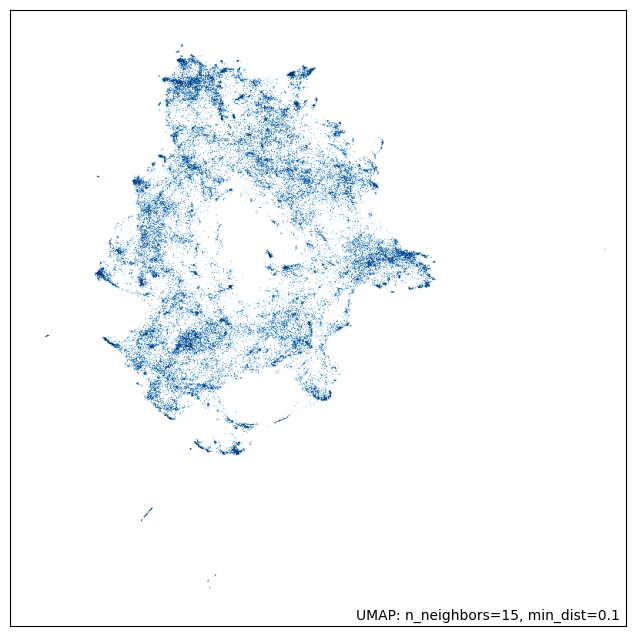

In [22]:
uplt.points(u)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 kB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
